In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Company_Data (1).csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [6]:
df.shape

(400, 11)

In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df1=df.copy()
df1.head(2)


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes

In [9]:
df.insert(11,'Sales_class'," ")

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i]<=7.5:
        df['Sales_class'].iloc[i]='Low'
    else:
        df['Sales_class'].iloc[i]='high'

In [10]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_class  
0         17   Yes  Yes        high  
1         10   Yes  Yes        high  
2         12   Yes  Yes        high  
3         14   Yes  Yes         Low  
4         13   Yes   No         Low

In [11]:
df.drop(['Sales'],axis=1,inplace=True)
df.head()

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_class  
0         17   Yes  Yes        high  
1         10   Yes  Yes        high  
2         12   Yes  Yes        high  
3         14   Yes  Yes         Low  
4         13   Yes   No         Low

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['Sales_class']= label_encoder.fit_transform(df['Sales_class'])

In [13]:
df.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  Sales_class  
0         17      1   1            1  
1         10      1   1            1  
2         12      1   1            1  
3         14      1   1            0  
4         13      1   0            0

In [14]:
## visulation

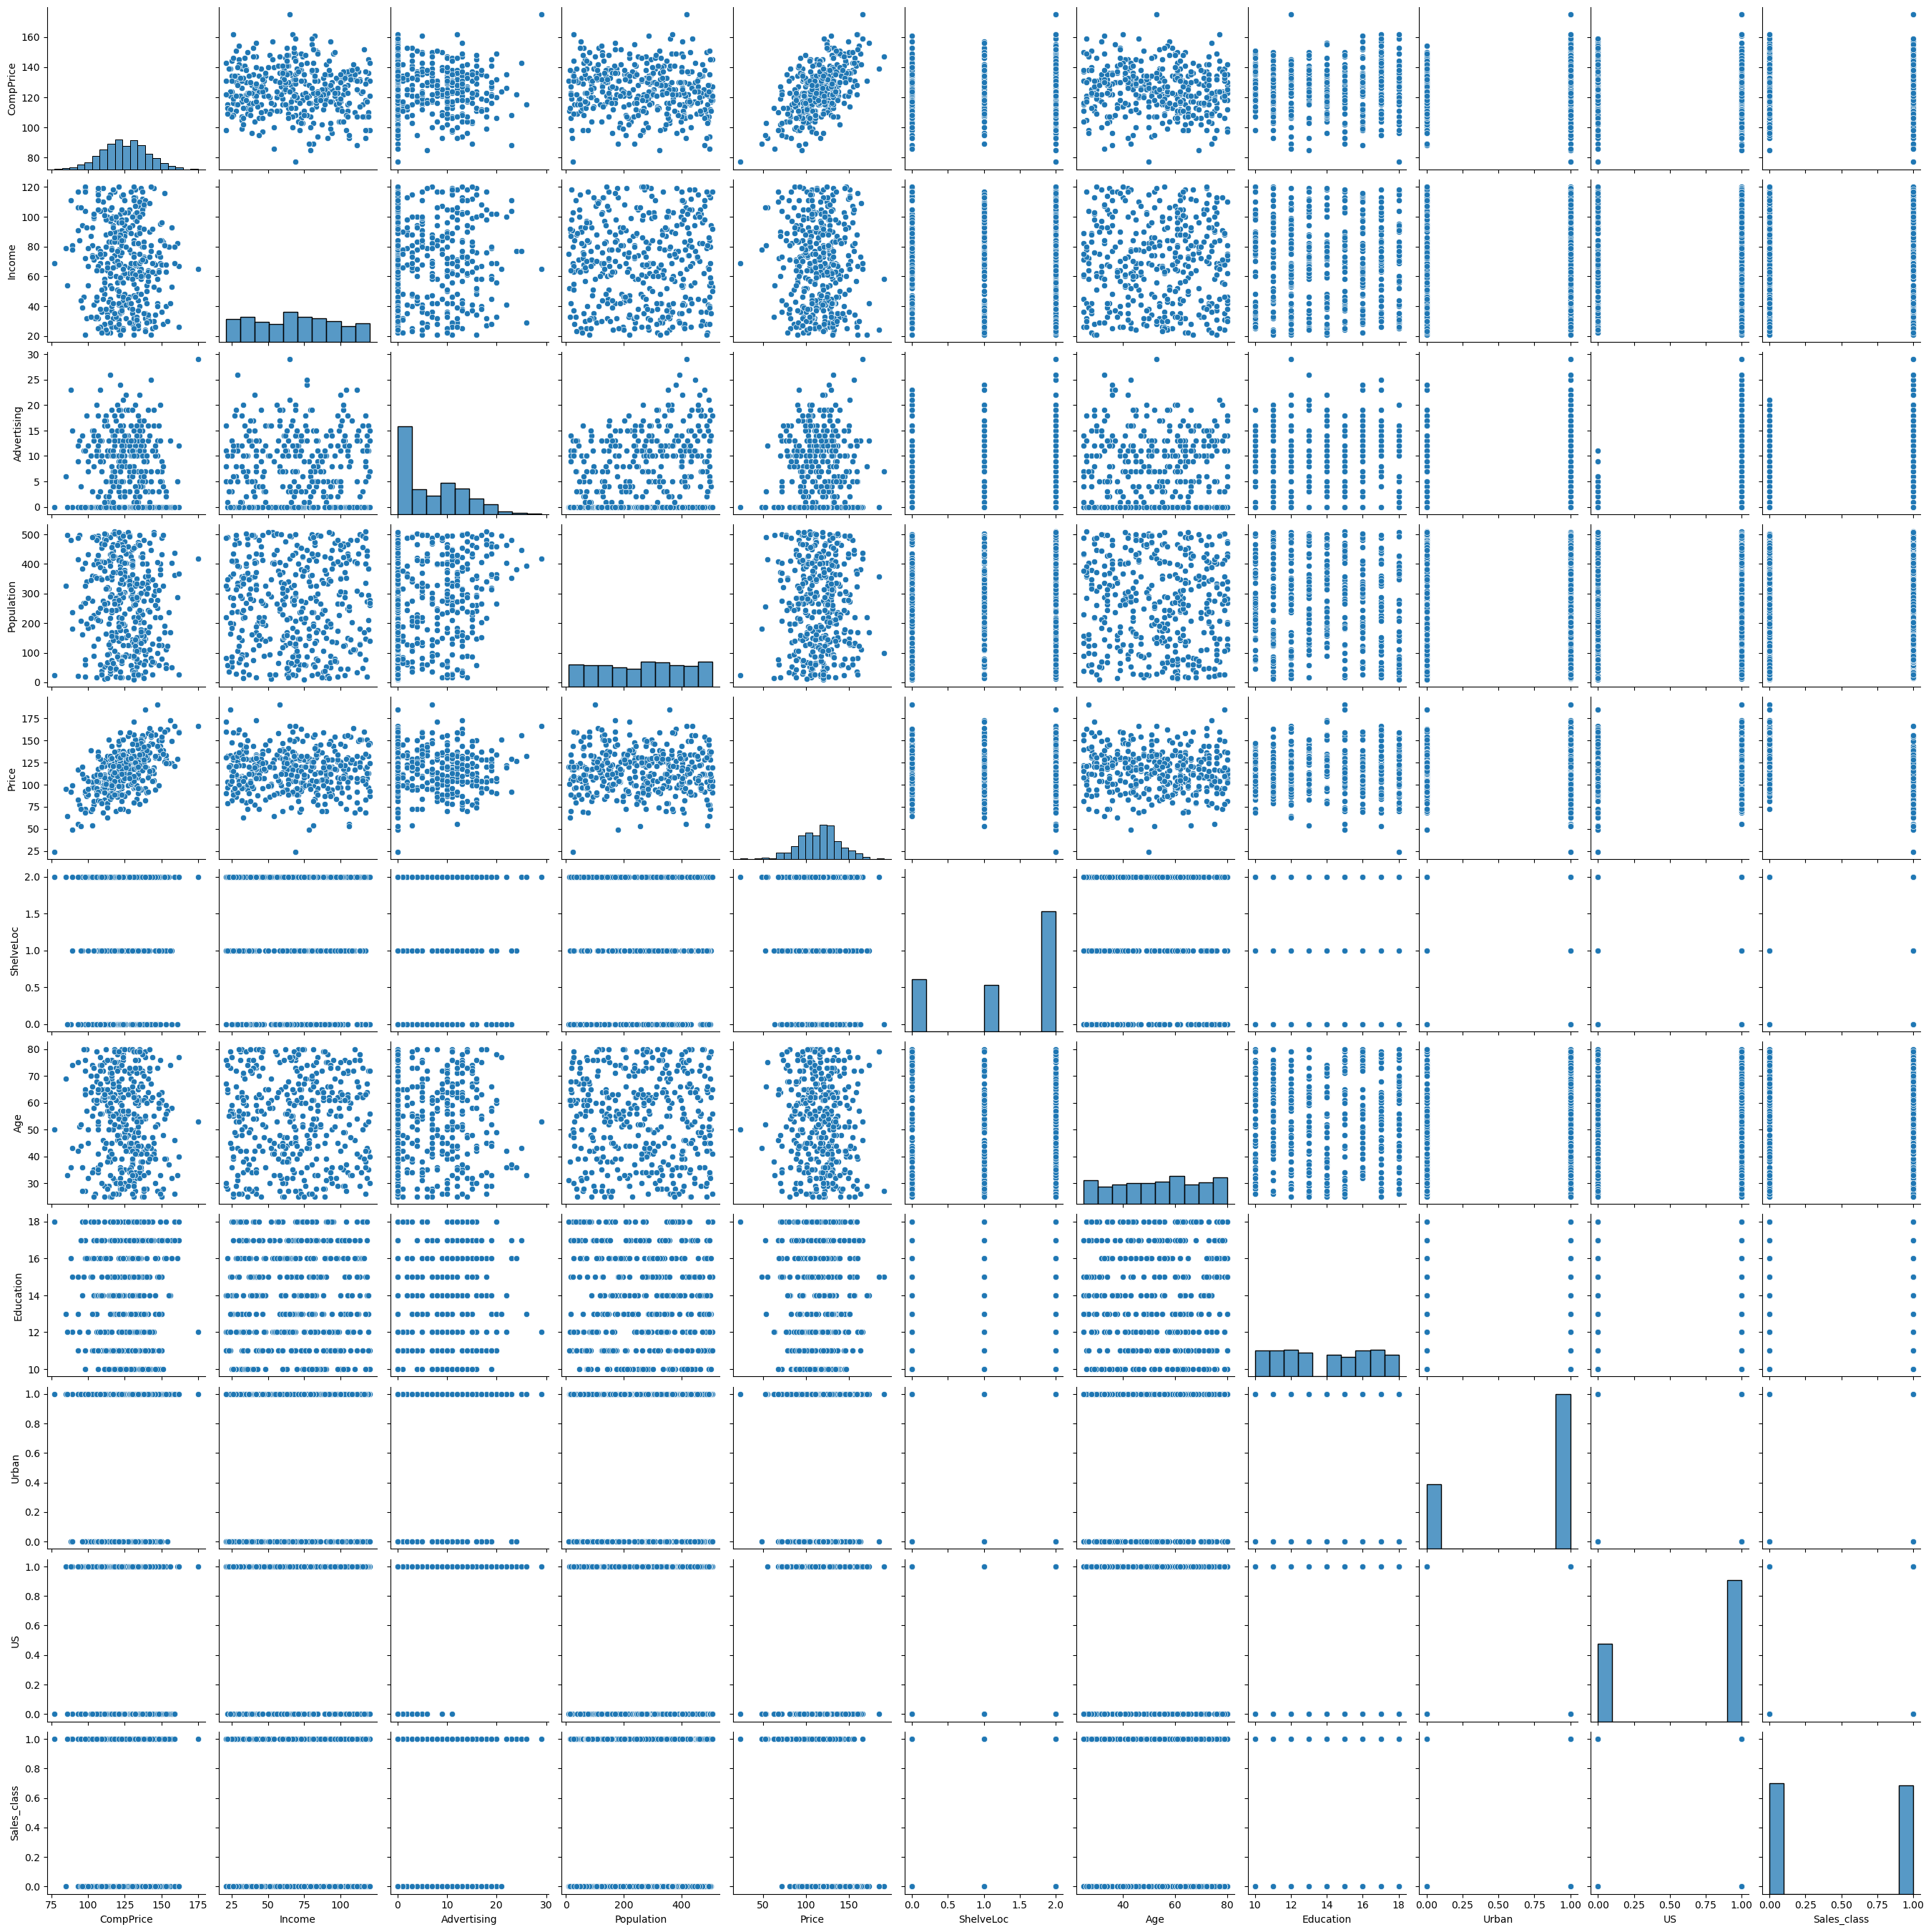

In [15]:
sns.pairplot(data=df)

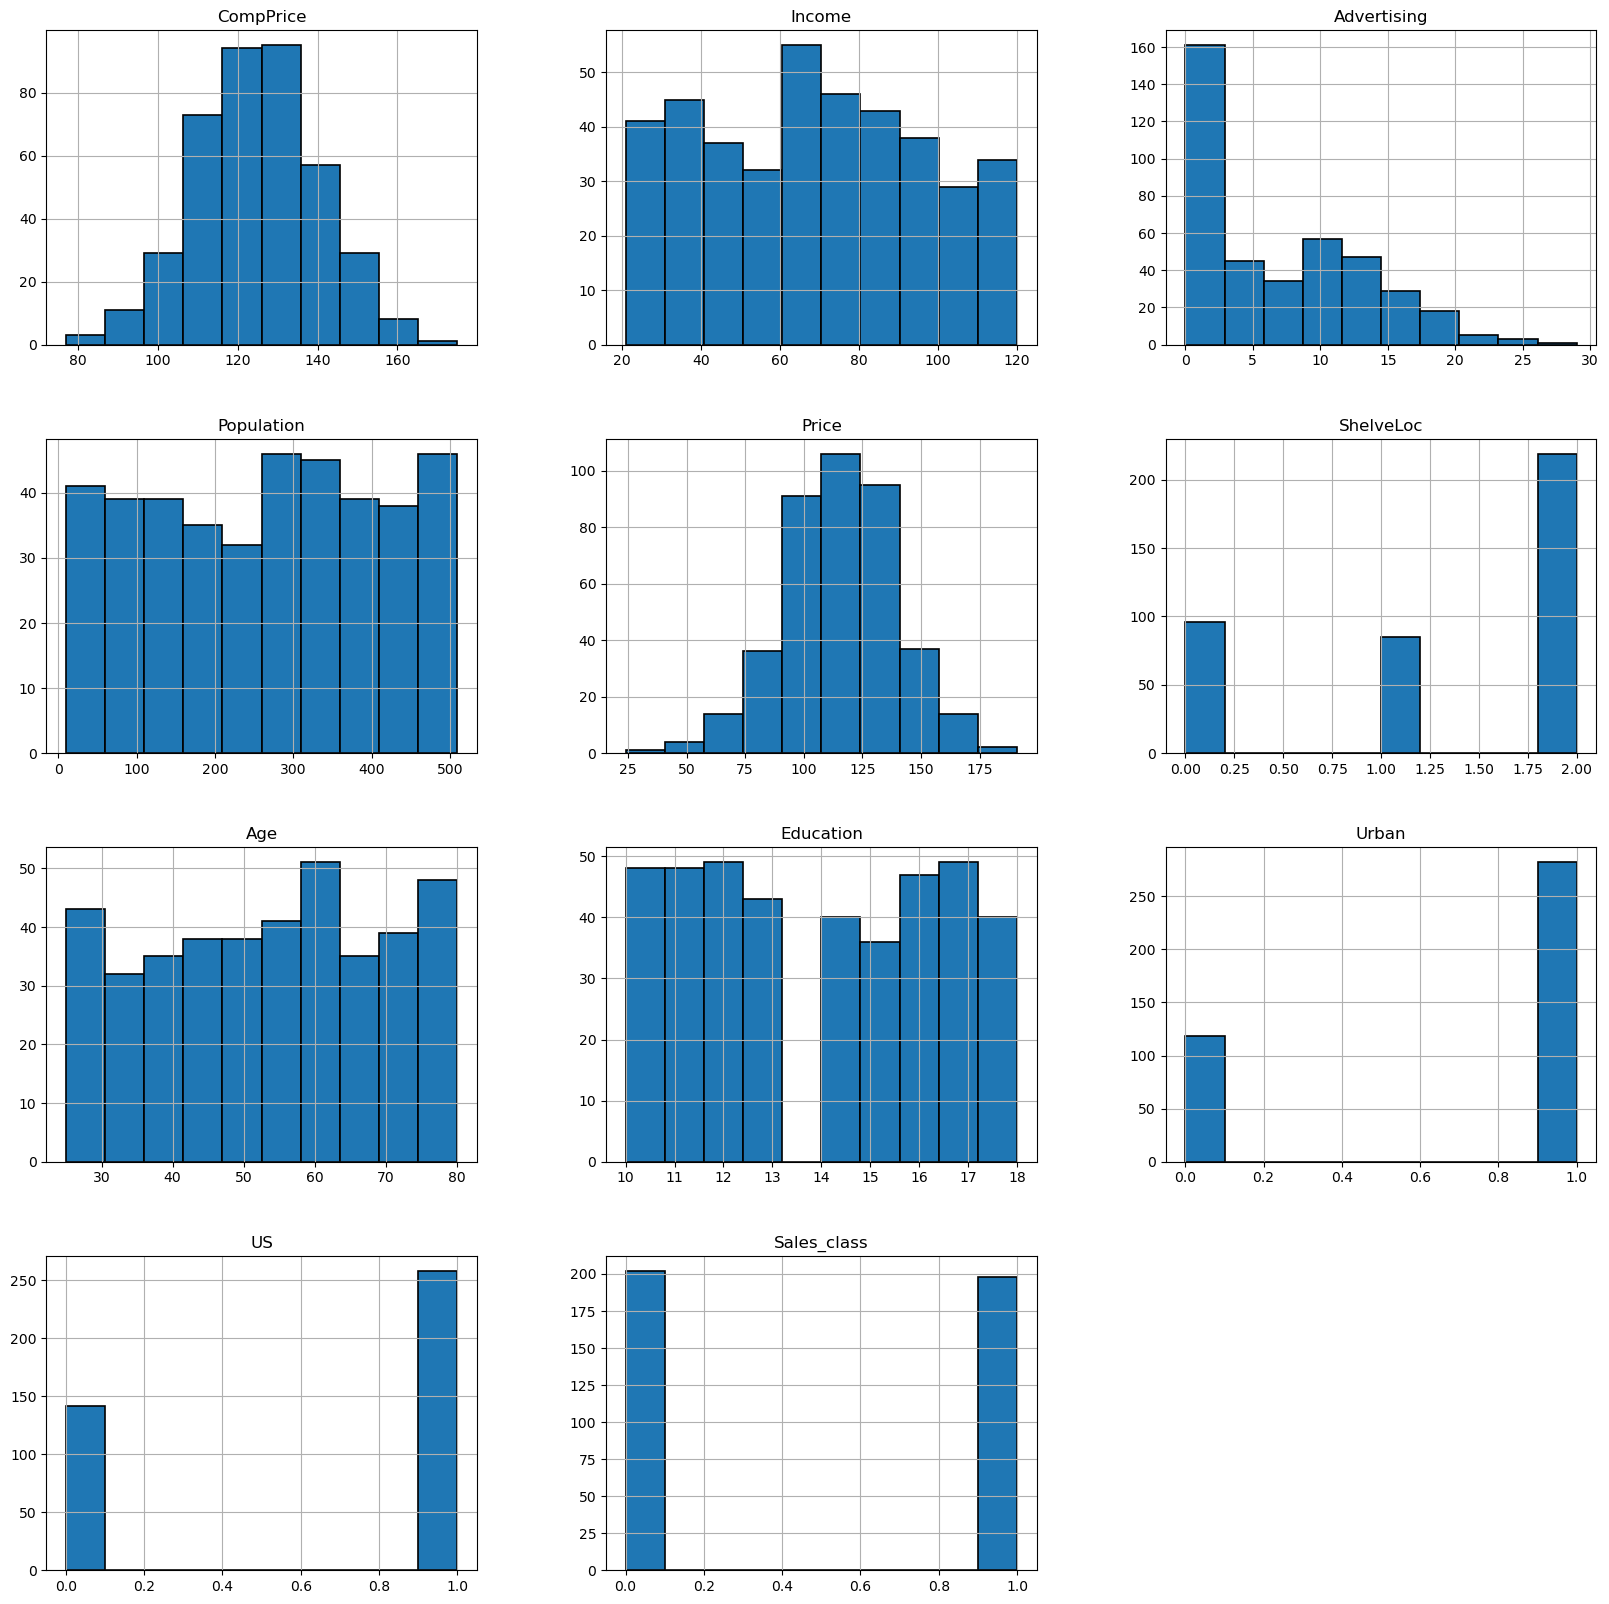

In [16]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

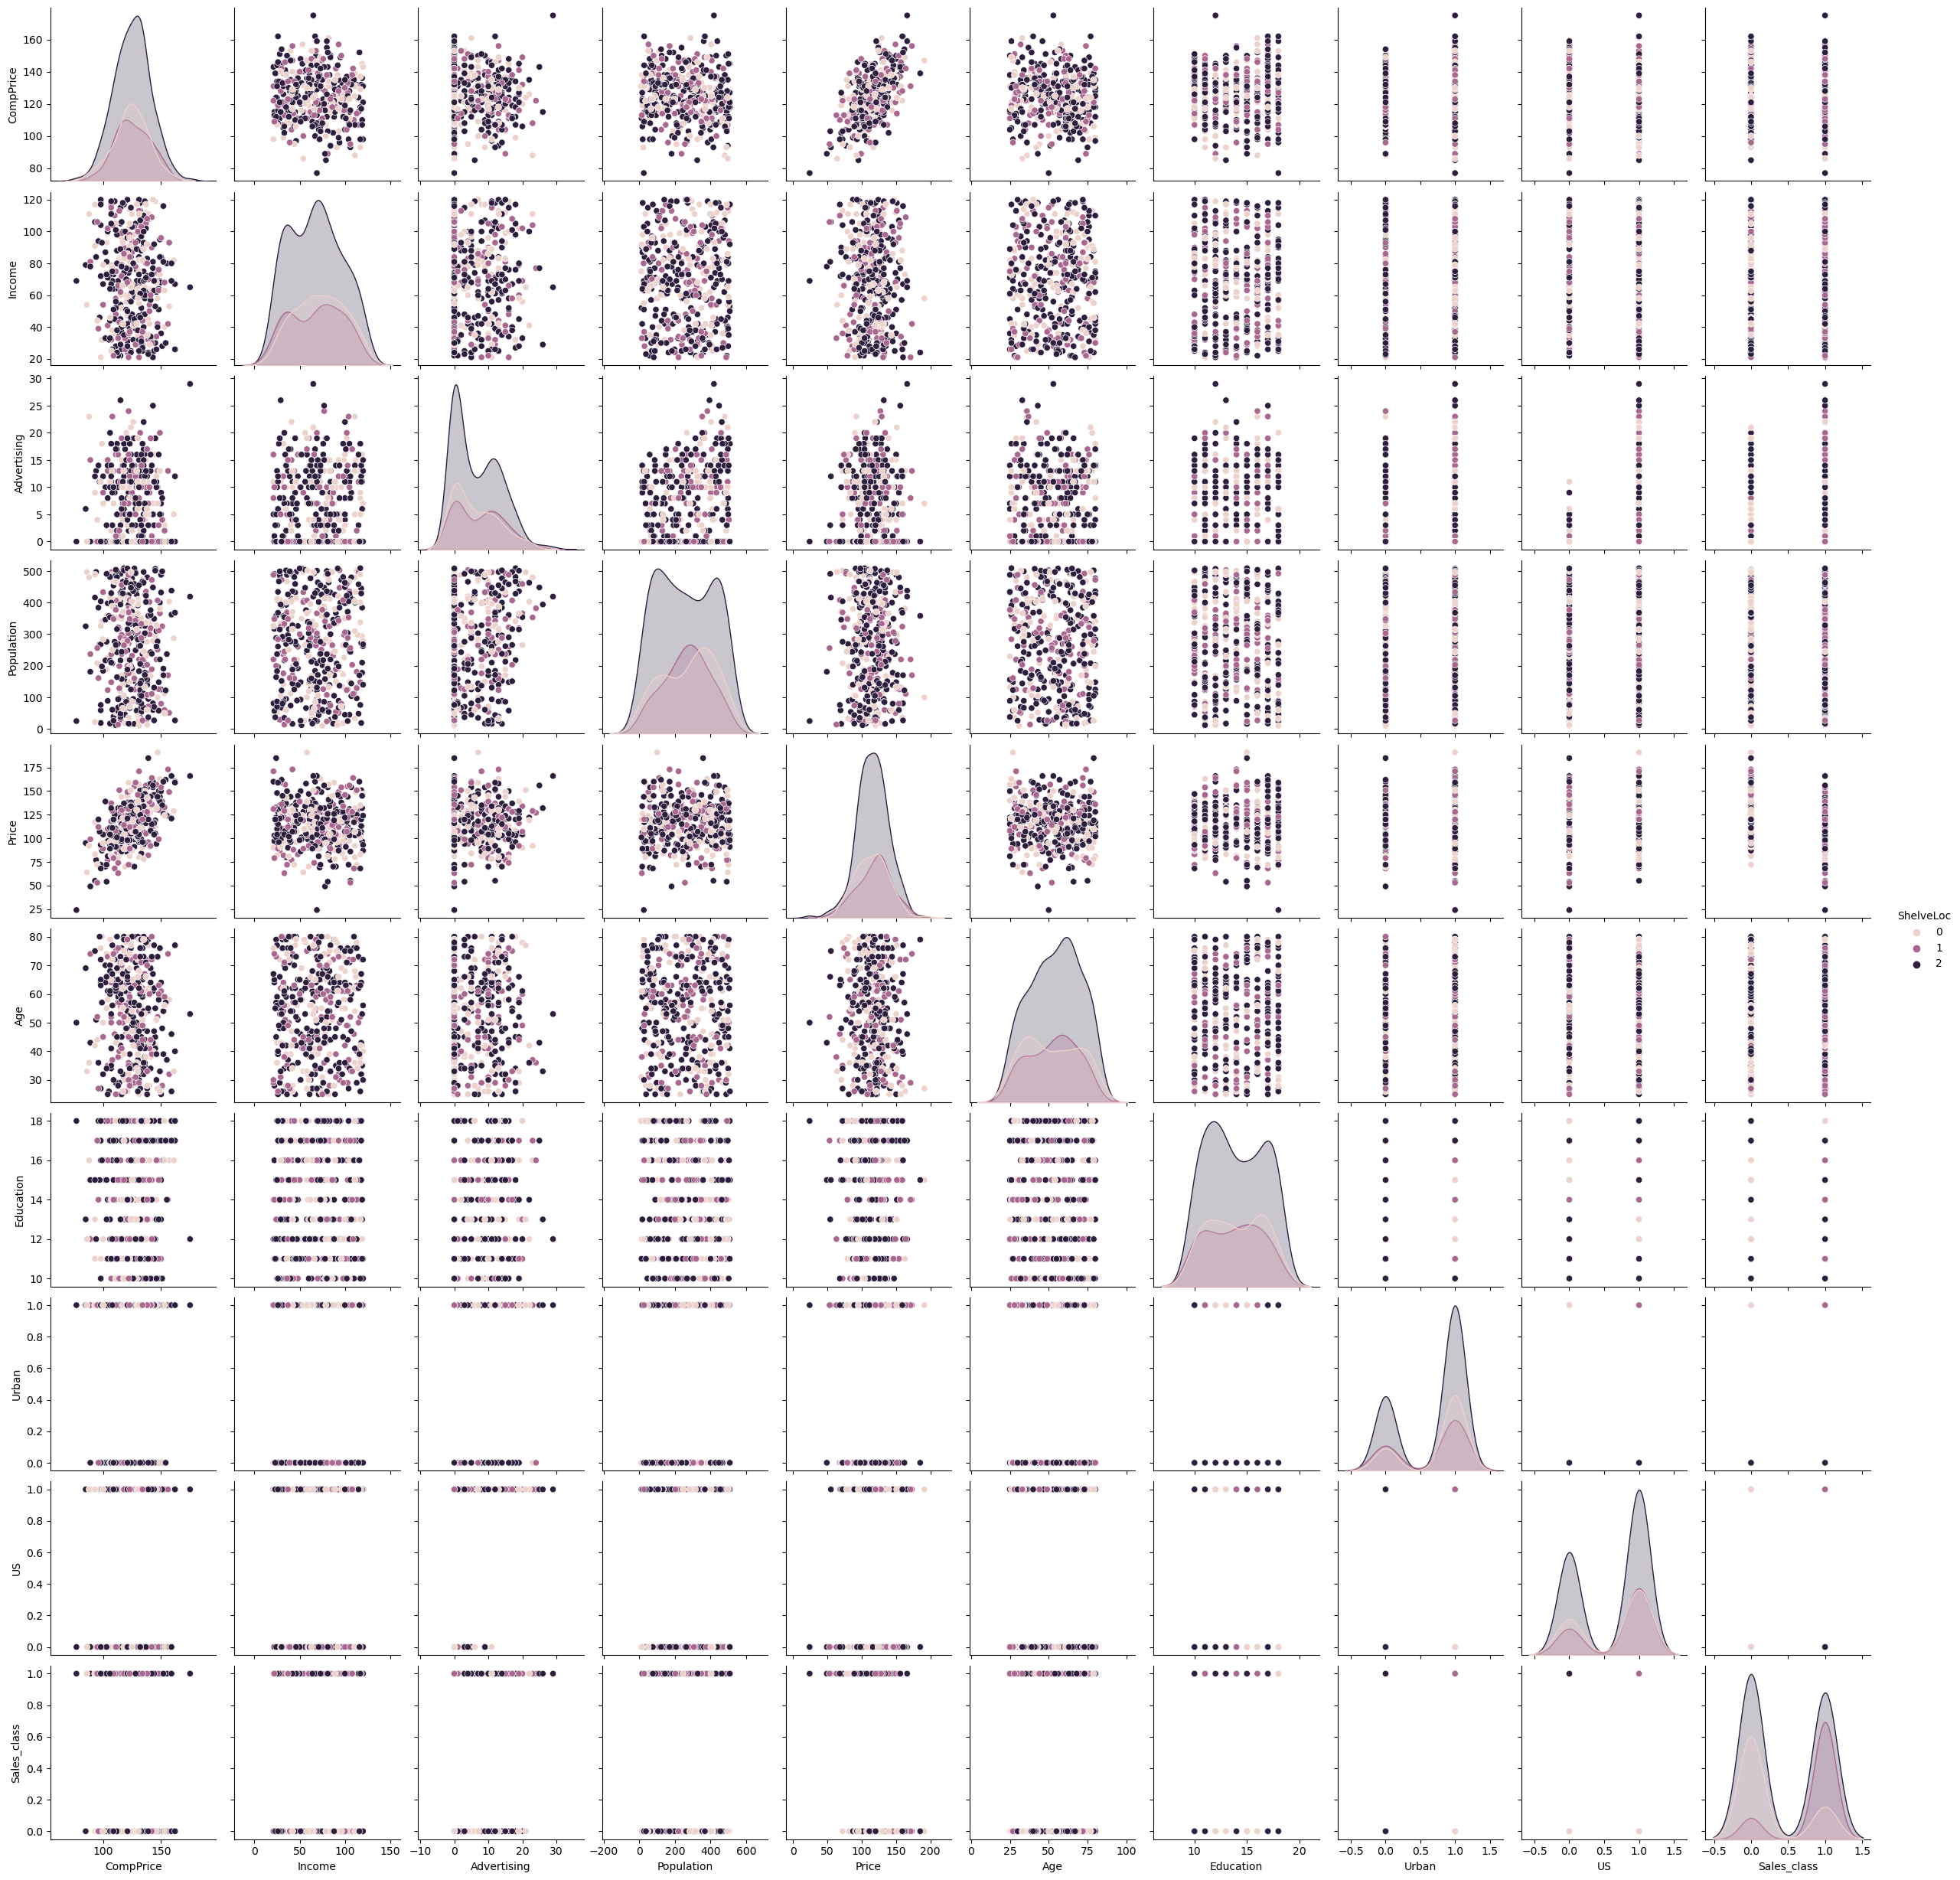

In [17]:
sns.pairplot(data=df,hue = 'ShelveLoc')

<AxesSubplot:>

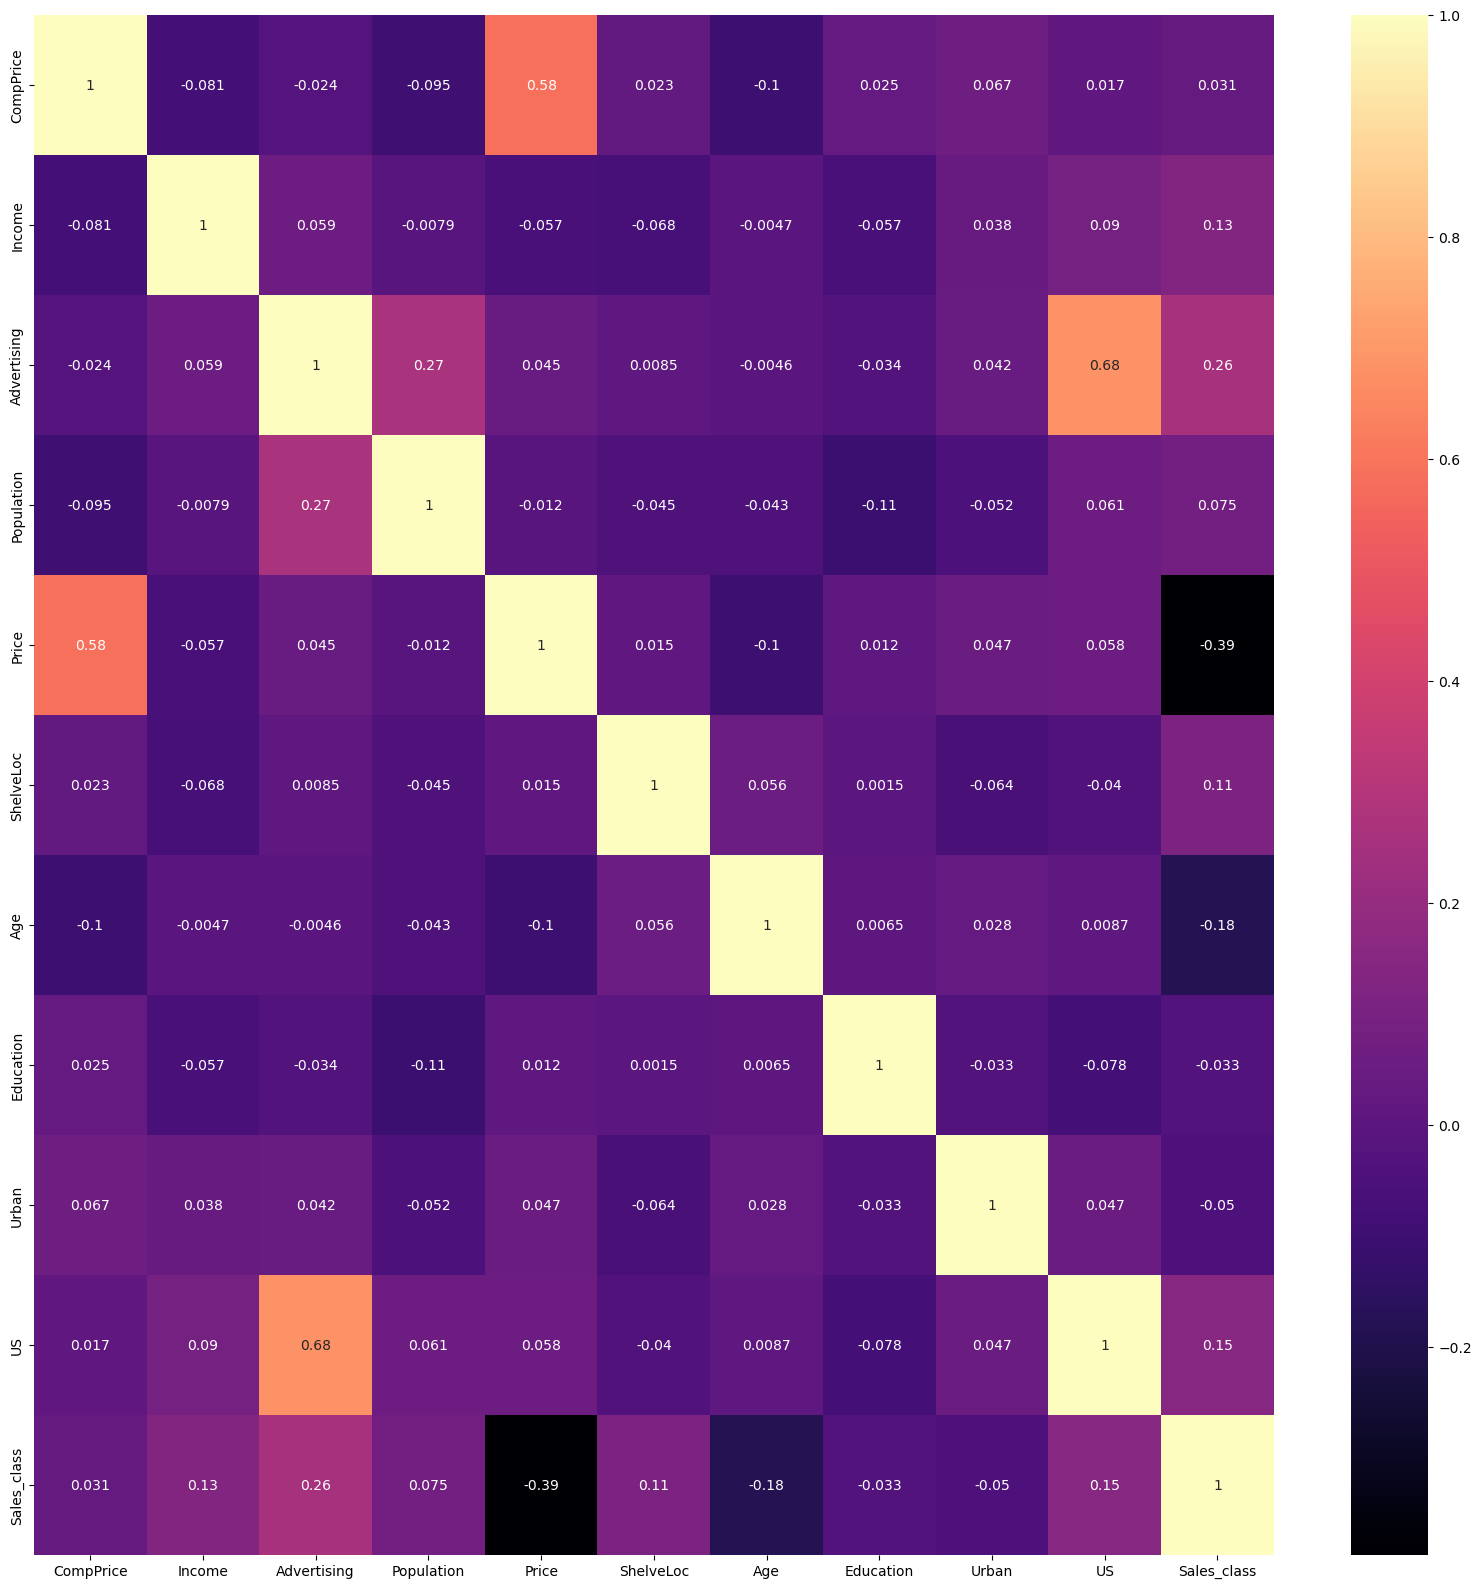

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='magma')

<AxesSubplot:>

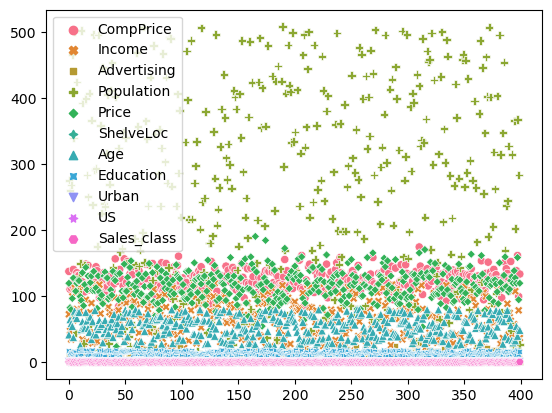

In [19]:
sns.scatterplot(data=df)

In [20]:
pdata=df.copy()

In [21]:
x=pdata.iloc[:,0:-1]
y=pdata['Sales_class']
y.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

In [22]:
## model building

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.8


In [26]:
### grid search

In [27]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 19,max_leaf_nodes=19,n_estimators=500)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.9425


In [28]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 19,max_leaf_nodes=19,n_estimators=500)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.95


In [29]:
###  Kfold

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

0.8225


In [31]:
### bagging techinque

In [32]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)

In [33]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.805


In [34]:
## ADaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8400000000000001


In [36]:
### Voting classifier

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [38]:
estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(base_estimator=modelb1)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(base_estimator=modelb1)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

In [39]:
ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

[0.825 0.875 0.75  0.775 0.775 0.95  0.825 0.75  0.85  0.85 ]


In [40]:
print(results.mean())

0.8225


In [41]:
## XGBM

In [48]:
#from tqdm.notebook import tqdm, trange
#import time
!pip install xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Defaulting to user installation because normal site-packages is not writeable


In [49]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [51]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [52]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [53]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.25%


In [54]:
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [55]:
## LGM

In [63]:
!pip install lightgbm
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

Defaulting to user installation because normal site-packages is not writeable
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)


In [64]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [65]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 155, number of negative: 165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484375 -> initscore=-0.062520
[LightGBM] [Info] Start training from score -0.062520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [66]:
y_pred=clf.predict(x_test)

In [67]:
predictions = [round(value) for value in y_pred]

In [68]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8

In [69]:
## RFE

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [71]:
RFE.predict

<function sklearn.feature_selection._rfe.RFE.predict(self, X)>

In [72]:
modelf=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
final_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
a = [2,3,4,5,6,7,8,9,10,11,12] 
parameter = ({'n_features_to_select':a})
rfe = RFE(modelf)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [74]:
gridRFE = GridSearchCV(rfe,parameter)
gridRFE.fit(x_train,y_train)
gridRFE.best_params_

{'n_features_to_select': 10}

In [75]:
a=RFE(final_model)

In [76]:
a.fit(x_train,y_train) 

RFE(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                     max_leaf_nodes=19, min_samples_leaf=4))

In [77]:
a.support_

array([ True, False,  True, False,  True,  True,  True, False, False,
       False])

In [78]:
a.ranking_

array([1, 2, 1, 3, 1, 1, 1, 6, 5, 4])

In [79]:
df.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  Sales_class  
0         17      1   1            1  
1         10      1   1            1  
2         12      1   1            1  
3         14      1   1            0  
4         13      1   0            0

In [80]:
rfe_df=df.copy()
rfe_df.head(2)

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   

   Education  Urban  US  Sales_class  
0         17      1   1            1  
1         10      1   1            1

In [81]:
rfe_df.drop(['Population','Urban','US','Education'],axis=1,inplace=True)

In [82]:
rfe_df.head(2)

CompPrice  Income  Advertising  Price  ShelveLoc  Age  Sales_class
0        138      73           11    120          0   42            1
1        111      48           16     83          1   65            1

In [83]:
rfe_df.Sales_class.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

In [84]:
x1=rfe_df.iloc[:,0:-1]
y1=rfe_df.iloc[:,-1]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.2,random_state=42)

In [86]:
#f_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
f_model=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
f_model.fit(x_train, y_train)
print(f_model.score(x_train, y_train))
print(f_model.score(x_test, y_test))

0.9375
0.825
